In [2]:
import os
import pandas as pd
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))
from configs.config import DATASET_PATH_FEATURES
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#train_data_path = os.path.join(DATASET_PATH_FEATURES, "training_features_40_512_256_128.parquet")
train_data_path = os.path.join(DATASET_PATH_FEATURES, "training_features_20_128_256_128.parquet")
train_df = pd.read_parquet(train_data_path)
train_df.dropna(inplace=True)




import numpy as np

mfcc_mean_cols = [f"mfcc_mean_{i}" for i in range(20)]
mfcc_std_cols = [f"mfcc_std_{i}" for i in range(20)]

mfcc_delta_mean_cols = [f"mfcc_delta_mean_{i}" for i in range(20)]
mfcc_delta_std_cols = [f"mfcc_delta_std_{i}" for i in range(20)]

mfcc_delta2_mean_cols = [f"mfcc_delta2_mean_{i}" for i in range(20)]
mfcc_delta2_std_cols = [f"mfcc_delta2_std_{i}" for i in range(20)]

mel_spectrogram_mean_cols = [f"mel_spectrogram_mean_{i}" for i in range(128)]
mel_spectrogram_std_cols = [f"mel_spectrogram_std_{i}" for i in range(128)]


train_df["mfcc_mean_over_mean_coeffs"] = train_df[mfcc_mean_cols].mean(axis=1)
train_df["mfcc_mean_over_std_coeffs"] = train_df[mfcc_std_cols].mean(axis=1)

train_df["mfcc_delta_mean_over_mean_coeffs"] = train_df[mfcc_delta_mean_cols].mean(axis=1)
train_df["mfcc_delta_mean_over_std_coeffs"] = train_df[mfcc_delta_std_cols].mean(axis=1)

train_df["mfcc_delta2_mean_over_mean_coeffs"] = train_df[mfcc_delta2_mean_cols].mean(axis=1)
train_df["mfcc_delta2_mean_over_std_coeffs"] = train_df[mfcc_delta2_std_cols].mean(axis=1)

train_df["mel_spectrogram_mean_over_mean_coeffs"] = train_df[mel_spectrogram_mean_cols].mean(axis=1)
train_df["mel_spectrogram_mean_over_std_coeffs"] = train_df[mel_spectrogram_std_cols].mean(axis=1)


train_df.drop(mfcc_mean_cols, inplace=True, axis=1)
train_df.drop(mfcc_std_cols, inplace=True, axis=1)

train_df.drop(mfcc_delta_mean_cols, inplace=True, axis=1)
train_df.drop(mfcc_delta_std_cols, inplace=True, axis=1)

train_df.drop(mfcc_delta2_mean_cols, inplace=True, axis=1)
train_df.drop(mfcc_delta2_std_cols, inplace=True, axis=1)

train_df.drop(mel_spectrogram_mean_cols, inplace=True, axis=1)
train_df.drop(mel_spectrogram_std_cols, inplace=True, axis=1)


label_map = {"real": 0, "fake": 1}
train_df["label_num"] = train_df["label"].map(label_map)


train_df.columns

Index(['label', 'filename', 'rmse_mean_0', 'rmse_std_0',
       'zero_crossing_rate_mean_0', 'zero_crossing_rate_std_0',
       'spectral_centroid_mean_0', 'spectral_centroid_std_0',
       'spectral_bandwidth_mean_0', 'spectral_bandwidth_std_0',
       'spectral_flatness_mean_0', 'spectral_flatness_std_0',
       'spectral_rolloff_mean_0', 'spectral_rolloff_std_0', 'pitch_yin_mean_0',
       'pitch_yin_std_0', 'mfcc_mean_over_mean_coeffs',
       'mfcc_mean_over_std_coeffs', 'mfcc_delta_mean_over_mean_coeffs',
       'mfcc_delta_mean_over_std_coeffs', 'mfcc_delta2_mean_over_mean_coeffs',
       'mfcc_delta2_mean_over_std_coeffs',
       'mel_spectrogram_mean_over_mean_coeffs',
       'mel_spectrogram_mean_over_std_coeffs', 'label_num'],
      dtype='object')

In [3]:
test_data_path = os.path.join(DATASET_PATH_FEATURES, "testing_features_20_128_256_128.parquet")
test_df = pd.read_parquet(test_data_path)
test_df.dropna(inplace=True)

test_df["mfcc_mean_over_mean_coeffs"] = test_df[mfcc_mean_cols].mean(axis=1)
test_df["mfcc_mean_over_std_coeffs"] = test_df[mfcc_std_cols].mean(axis=1)

test_df["mfcc_delta_mean_over_mean_coeffs"] = test_df[mfcc_delta_mean_cols].mean(axis=1)
test_df["mfcc_delta_mean_over_std_coeffs"] = test_df[mfcc_delta_std_cols].mean(axis=1)

test_df["mfcc_delta2_mean_over_mean_coeffs"] = test_df[mfcc_delta2_mean_cols].mean(axis=1)
test_df["mfcc_delta2_mean_over_std_coeffs"] = test_df[mfcc_delta2_std_cols].mean(axis=1)

test_df["mel_spectrogram_mean_over_mean_coeffs"] = test_df[mel_spectrogram_mean_cols].mean(axis=1)
test_df["mel_spectrogram_mean_over_std_coeffs"] = test_df[mel_spectrogram_std_cols].mean(axis=1)


test_df.drop(mfcc_mean_cols, inplace=True, axis=1)
test_df.drop(mfcc_std_cols, inplace=True, axis=1)

test_df.drop(mfcc_delta_mean_cols, inplace=True, axis=1)
test_df.drop(mfcc_delta_std_cols, inplace=True, axis=1)

test_df.drop(mfcc_delta2_mean_cols, inplace=True, axis=1)
test_df.drop(mfcc_delta2_std_cols, inplace=True, axis=1)

test_df.drop(mel_spectrogram_mean_cols, inplace=True, axis=1)
test_df.drop(mel_spectrogram_std_cols, inplace=True, axis=1)


label_map = {"real": 0, "fake": 1}
test_df["label_num"] = test_df["label"].map(label_map)


test_df.columns

Index(['label', 'filename', 'rmse_mean_0', 'rmse_std_0',
       'zero_crossing_rate_mean_0', 'zero_crossing_rate_std_0',
       'spectral_centroid_mean_0', 'spectral_centroid_std_0',
       'spectral_bandwidth_mean_0', 'spectral_bandwidth_std_0',
       'spectral_flatness_mean_0', 'spectral_flatness_std_0',
       'spectral_rolloff_mean_0', 'spectral_rolloff_std_0', 'pitch_yin_mean_0',
       'pitch_yin_std_0', 'mfcc_mean_over_mean_coeffs',
       'mfcc_mean_over_std_coeffs', 'mfcc_delta_mean_over_mean_coeffs',
       'mfcc_delta_mean_over_std_coeffs', 'mfcc_delta2_mean_over_mean_coeffs',
       'mfcc_delta2_mean_over_std_coeffs',
       'mel_spectrogram_mean_over_mean_coeffs',
       'mel_spectrogram_mean_over_std_coeffs', 'label_num'],
      dtype='object')

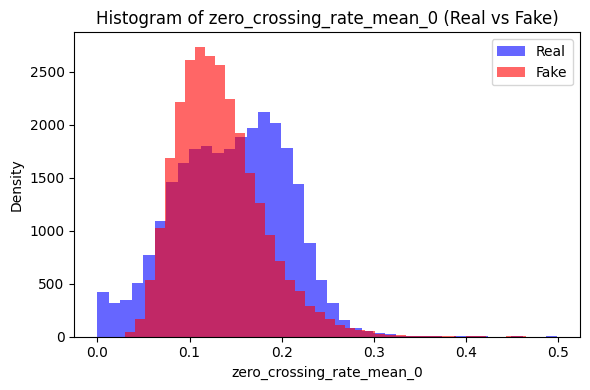

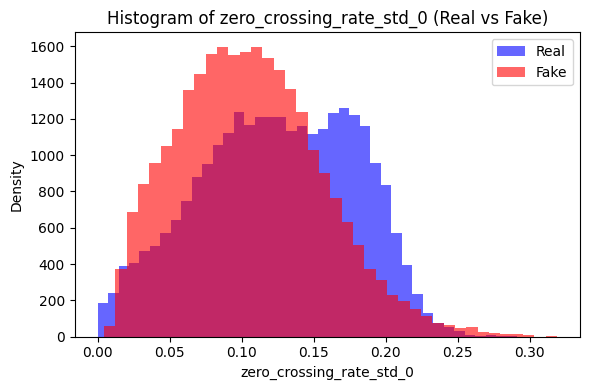

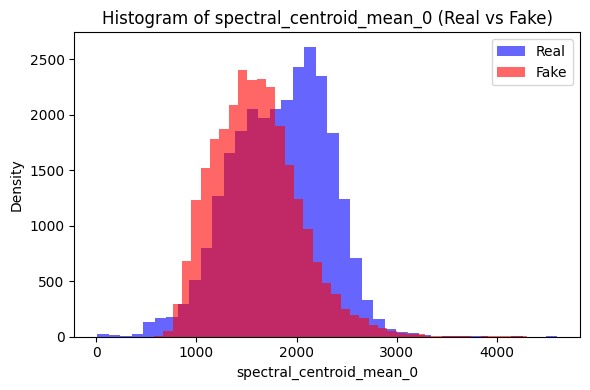

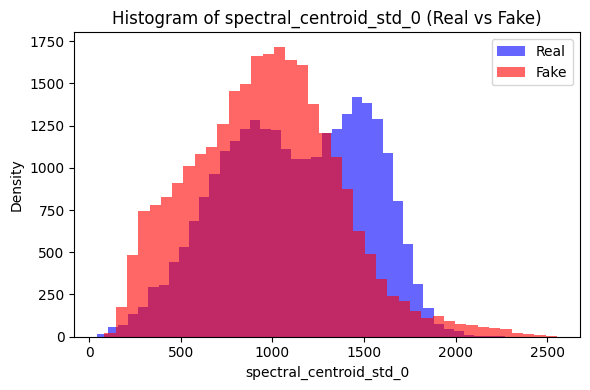

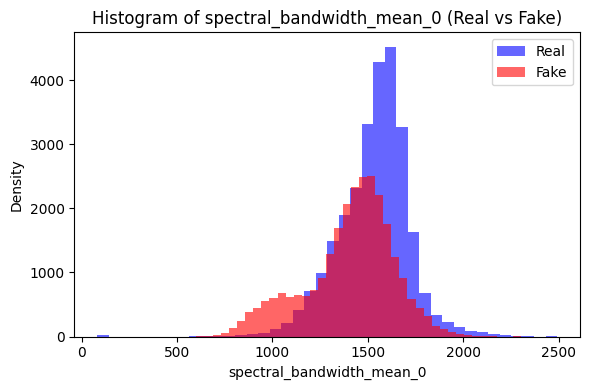

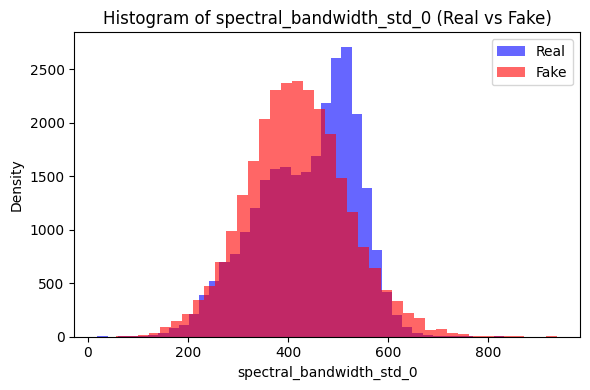

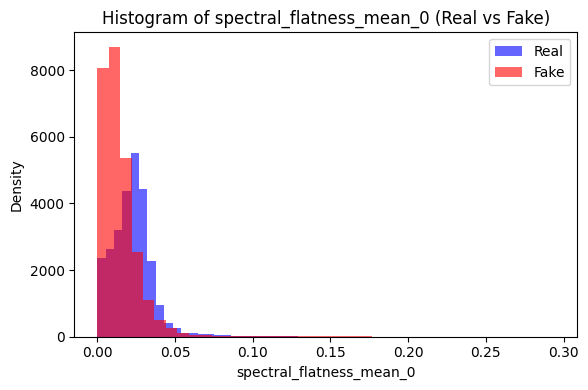

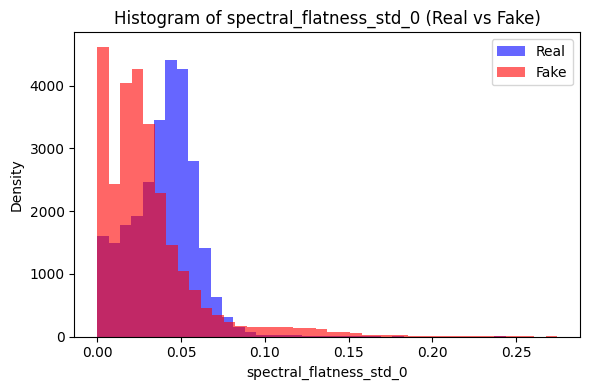

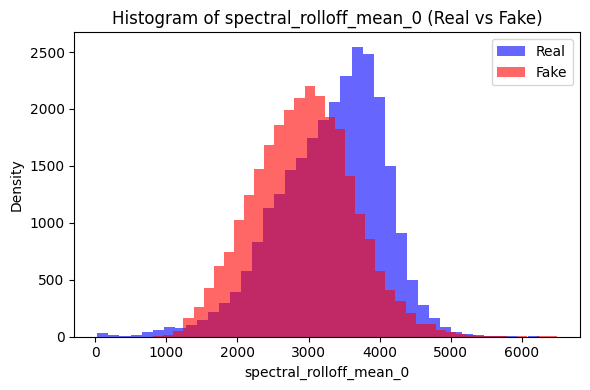

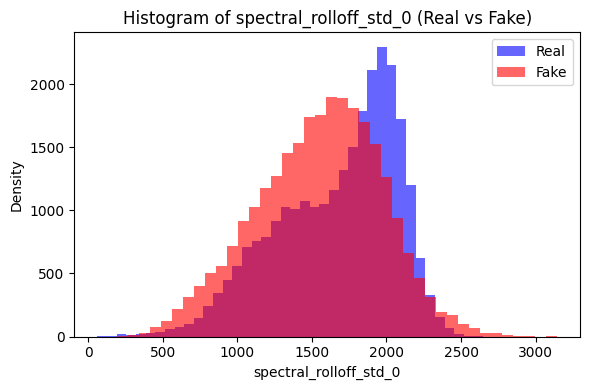

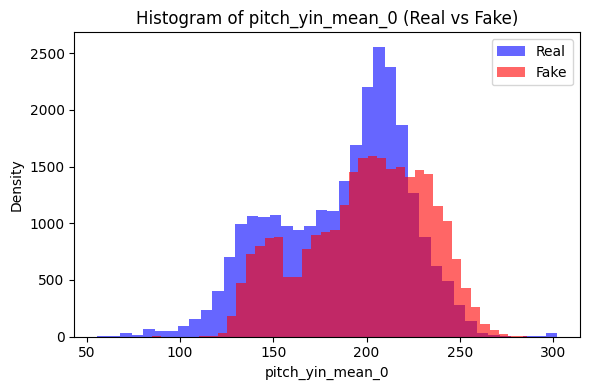

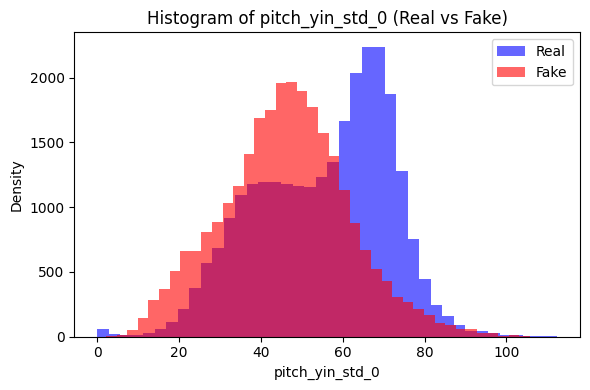

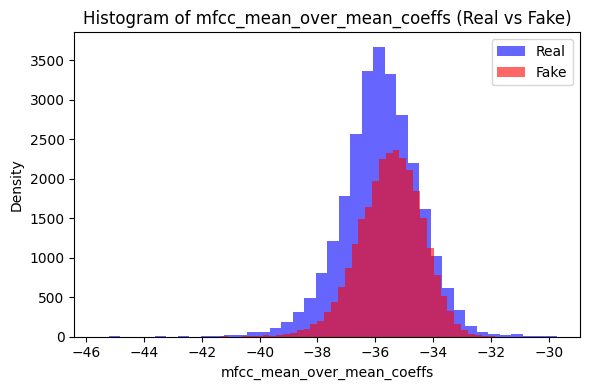

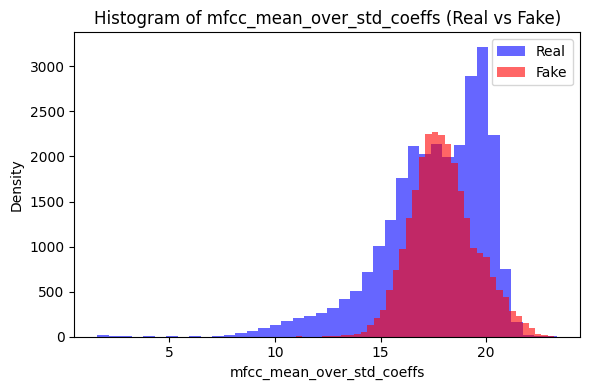

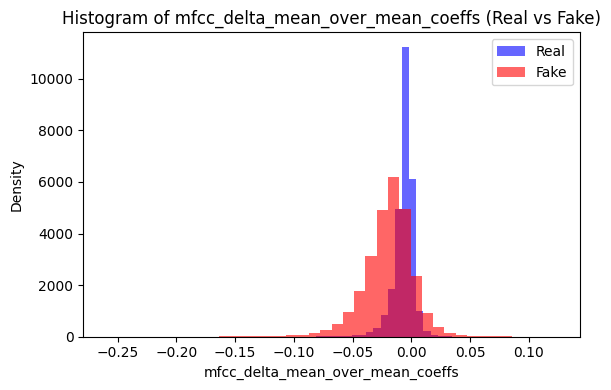

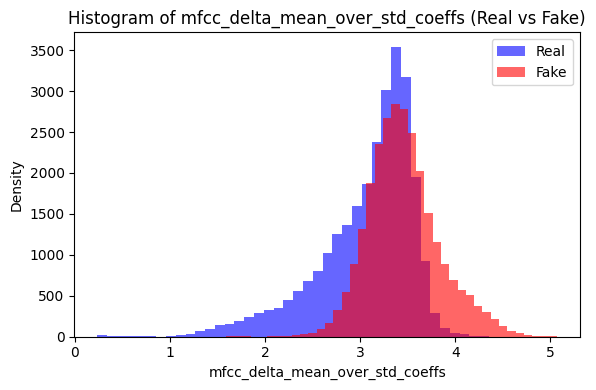

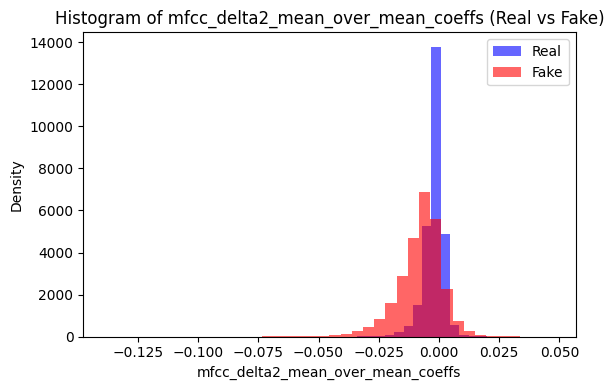

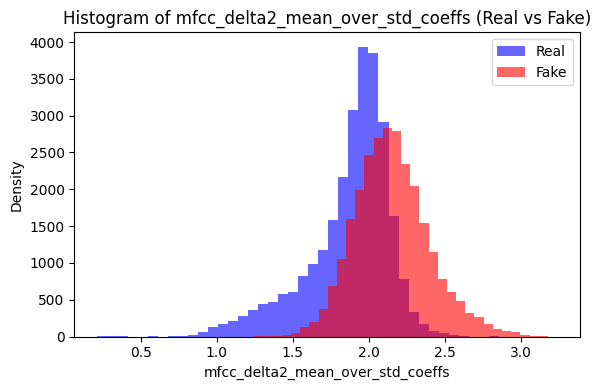

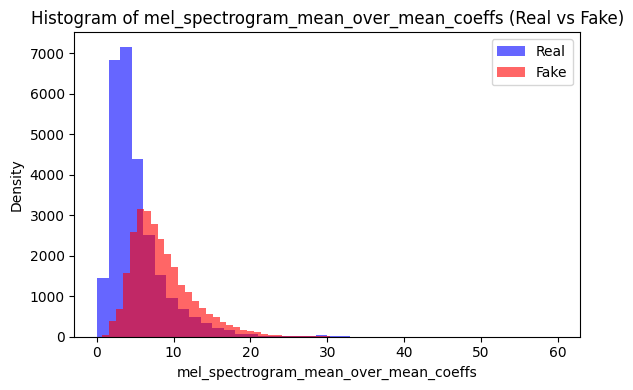

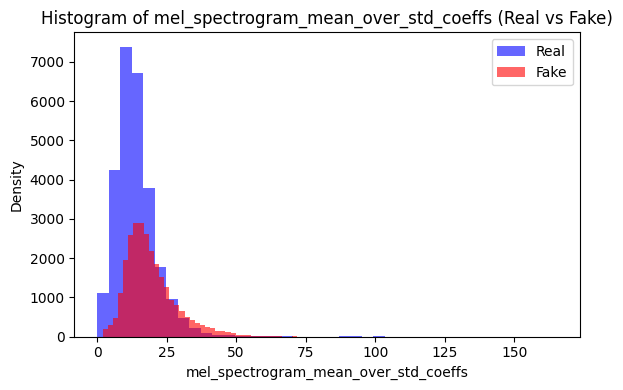

In [3]:
import matplotlib.pyplot as plt

features = [
    'zero_crossing_rate_mean_0', 'zero_crossing_rate_std_0',
    'spectral_centroid_mean_0', 'spectral_centroid_std_0',
    'spectral_bandwidth_mean_0', 'spectral_bandwidth_std_0',
    'spectral_flatness_mean_0', 'spectral_flatness_std_0',
    'spectral_rolloff_mean_0', 'spectral_rolloff_std_0',
    'pitch_yin_mean_0', 'pitch_yin_std_0',
    'mfcc_mean_over_mean_coeffs', 'mfcc_mean_over_std_coeffs',
    'mfcc_delta_mean_over_mean_coeffs', 'mfcc_delta_mean_over_std_coeffs',
    'mfcc_delta2_mean_over_mean_coeffs', 'mfcc_delta2_mean_over_std_coeffs',
    'mel_spectrogram_mean_over_mean_coeffs', 'mel_spectrogram_mean_over_std_coeffs'
]

for feature in features:
    plt.figure(figsize=(6, 4))
    
    # Histogram for real samples
    plt.hist(
        train_df[train_df["label"] == "real"][feature],
        bins=40,
        alpha=0.6,
        label="Real",
        color="blue",
        density=False  # normalize so distributions are comparable
    )
    
    # Histogram for fake samples
    plt.hist(
        train_df[train_df["label"] == "fake"][feature],
        bins=40,
        alpha=0.6,
        label="Fake",
        color="red",
        density=False
    )
    
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.title(f"Histogram of {feature} (Real vs Fake)")
    plt.legend()
    plt.tight_layout()
    plt.show()


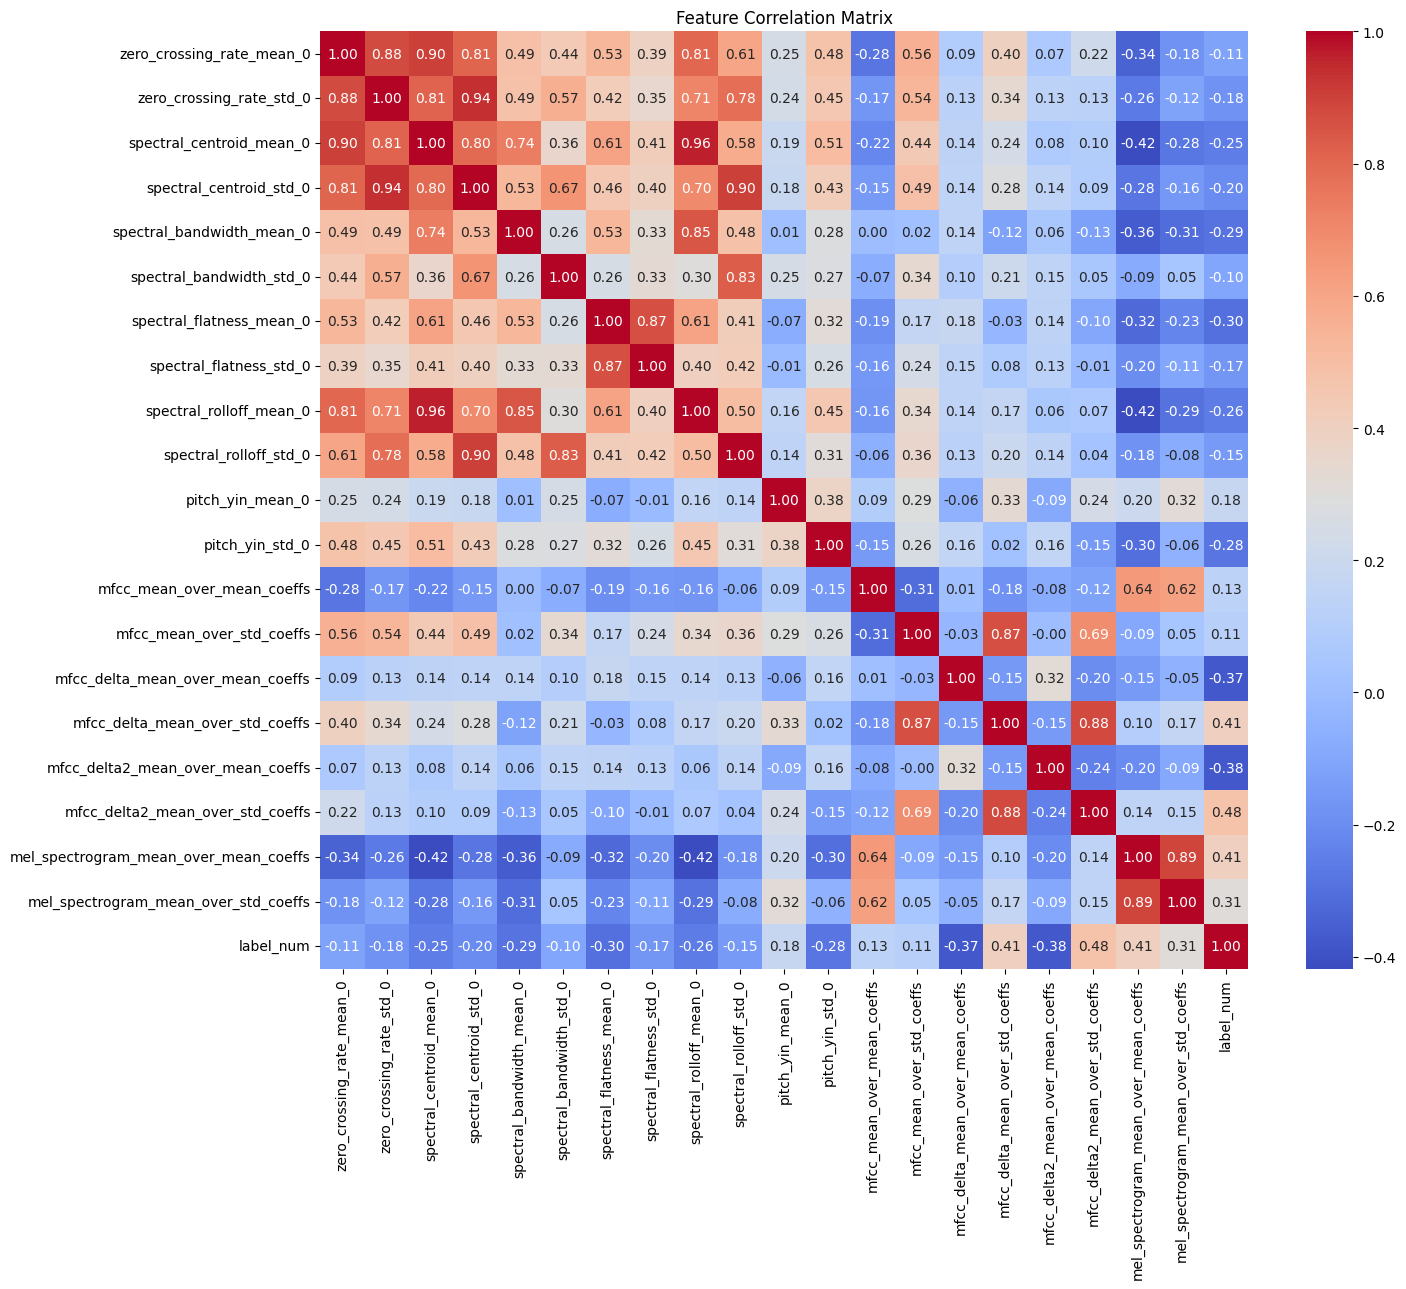

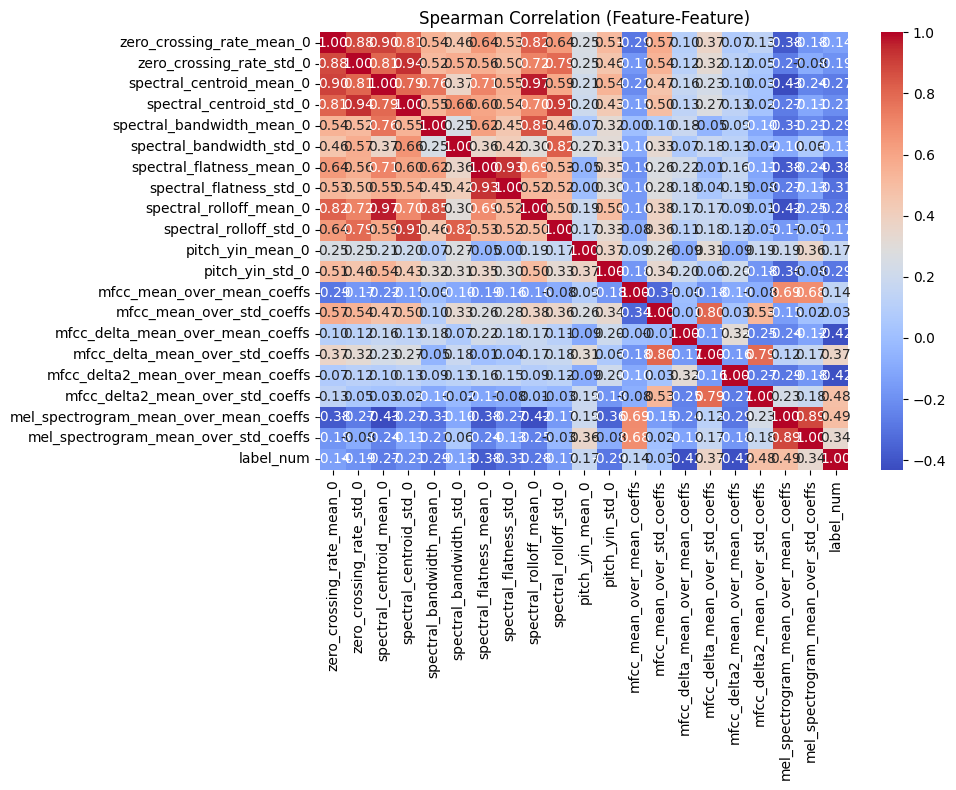

In [4]:
features = [
    'zero_crossing_rate_mean_0', 'zero_crossing_rate_std_0',
    'spectral_centroid_mean_0', 'spectral_centroid_std_0',
    'spectral_bandwidth_mean_0', 'spectral_bandwidth_std_0',
    'spectral_flatness_mean_0', 'spectral_flatness_std_0',
    'spectral_rolloff_mean_0', 'spectral_rolloff_std_0',
    'pitch_yin_mean_0', 'pitch_yin_std_0',
    'mfcc_mean_over_mean_coeffs', 'mfcc_mean_over_std_coeffs',
    'mfcc_delta_mean_over_mean_coeffs', 'mfcc_delta_mean_over_std_coeffs',
    'mfcc_delta2_mean_over_mean_coeffs', 'mfcc_delta2_mean_over_std_coeffs',
    'mel_spectrogram_mean_over_mean_coeffs', 'mel_spectrogram_mean_over_std_coeffs', "label_num"
]

corr_matrix = train_df[features].corr()  # default is Pearson correlation

# Optional: visualize as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 13))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# Spearman correlation (feature-feature)
spearman_corr = train_df[features].corr(method="spearman")

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation (Feature-Feature)")
plt.tight_layout()
plt.show()


In [ ]:
# -------------------------------
# 1. Imports
# -------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# -------------------------------
# 2. Select features and target
# -------------------------------
features = [
    'zero_crossing_rate_mean_0', 'zero_crossing_rate_std_0',
    'spectral_centroid_mean_0', 'spectral_centroid_std_0',
    'spectral_bandwidth_mean_0', 'spectral_bandwidth_std_0',
    'spectral_flatness_mean_0', 'spectral_flatness_std_0',
    'spectral_rolloff_mean_0', 'spectral_rolloff_std_0',
    'pitch_yin_mean_0', 'pitch_yin_std_0',
    'mfcc_mean_over_mean_coeffs', 'mfcc_mean_over_std_coeffs',
    'mfcc_delta_mean_over_mean_coeffs', 'mfcc_delta_mean_over_std_coeffs',
    'mfcc_delta2_mean_over_mean_coeffs', 'mfcc_delta2_mean_over_std_coeffs',
    'mel_spectrogram_mean_over_mean_coeffs', 'mel_spectrogram_mean_over_std_coeffs'
]

X_train = train_df[features]

# Convert label to numeric
y_train = train_df['label'].map({'real':0, 'fake':1})

X_test = test_df[features]

# Convert label to numeric
y_test = test_df['label'].map({'real':0, 'fake':1})

# -------------------------------
# 3. Train-test split
# -------------------------------
"""
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
"""
# -------------------------------
# 4. Standardize features
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 5. Train logistic regression
# -------------------------------
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

# -------------------------------
# 6. Evaluate
# -------------------------------
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:,1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_proba))

# -------------------------------
# 7. Feature coefficients (optional)
# -------------------------------
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": clf.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("Top features by absolute coefficient:")
print(coef_df)


Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.21      0.27      2264
           1       0.46      0.64      0.54      2370

    accuracy                           0.43      4634
   macro avg       0.41      0.43      0.40      4634
weighted avg       0.41      0.43      0.40      4634

Confusion Matrix:
[[ 478 1786]
 [ 846 1524]]
ROC-AUC Score:
0.42158123481087206
Top features by absolute coefficient:
                                  Feature  Coefficient
0               zero_crossing_rate_mean_0     4.169414
2                spectral_centroid_mean_0    -4.056459
15        mfcc_delta_mean_over_std_coeffs     3.759812
1                zero_crossing_rate_std_0    -2.635574
6                spectral_flatness_mean_0    -2.366569
13              mfcc_mean_over_std_coeffs    -2.015157
18  mel_spectrogram_mean_over_mean_coeffs     1.758113
7                 spectral_flatness_std_0     1.723007
19   mel_spectrogram_mean_over_std_co